# Travel time, Study Time and Impact on Academic Performance?

#### Group Members: Selin Acikgoz, Yuening Lu, Aman Mehra, Praneel Talluri

### _Background_

Many studies found that the academic performance of students who study more are more successful than those who study less. 
Longer travel times consume time and energy and they can affect studying and academic success. Travel time affects studying habits. It was found that decreased travel time resulted in higher grades (Dutton, Dutton & Perry, 2002). Also, another study suggested that students living on campus have higher academic performance than students living off-campus (Turly & Wodtke, 2010). 
Travel time can decrease study time and study time has been found to positively impact academic performance. 

### _Questions_

* Is there a correlation between study time and academic performance (final grade), and can higher study time lead to higher student performance (final grade)? 
* Can we predict the travel time of a student, using study time and academic performance (final grade) as predictors?  


### _Data Set Information_

The data is collected from two Portuguese high schools. The data includes student grades, demographic, social, and school-related features and obtained through school reports and questionnaires. Two datasets are presented: Mathematics (mat) and Portuguese language (por). We’re going to be using the Portuegese language dataset. We picked two predictors to predict student performance; travel time and study time. Travel time is the total amount of time student spend on the trip, from home to school (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour). Study time is the total amount of time student spend studying weekly (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours). In our dataset, grades are used as an indicator of academic performance (G1, G2, G3).


### _Preliminary Exploratory Data Analysis_

**Our Code:** 

In [101]:
library(tidyverse)
library(repr)
library(tidymodels)

In [102]:
student_performance <- read_delim("student-por.csv", delim = ";")

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



In [103]:
head(student_performance)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


In [104]:
ncol(student_performance)

[1] 33

In [105]:
nrow(student_performance)

[1] 649

In [111]:
missing_data <- sum(is.na(student_performance))
missing_data

[1] 0

**There is no missing data in the dataset.**

In [113]:
student_performance <- mutate(student_performance,
                             traveltime = as.character(traveltime))
head(student_performance)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


In [114]:
student_performance_select <- select(student_performance, sex, age, studytime, traveltime, G3) 
head(student_performance_select)

sex,age,studytime,traveltime,G3
<chr>,<dbl>,<dbl>,<chr>,<dbl>
F,18,2,2,11
F,17,2,1,11
F,15,2,1,12
F,15,3,1,14
F,16,2,1,13
M,16,2,1,13


In [115]:
student_performance_training <- student_performance_select[1:316,]
head(student_performance_training)
student_performance_test <- student_performance_select[317:395,]
head(student_performance_test)

sex,age,studytime,traveltime,G3
<chr>,<dbl>,<dbl>,<chr>,<dbl>
F,18,2,2,11
F,17,2,1,11
F,15,2,1,12
F,15,3,1,14
F,16,2,1,13
M,16,2,1,13


sex,age,studytime,traveltime,G3
<chr>,<dbl>,<dbl>,<chr>,<dbl>
F,17,2,2,16
F,17,2,2,12
F,18,2,2,10
M,18,1,2,12
F,18,2,1,13
F,17,3,3,15


In [116]:
student_performance_training_G3_summary <- summary(student_performance_training$G3)
student_performance_training_G3_summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   11.00   12.00   12.14   14.00   18.00 

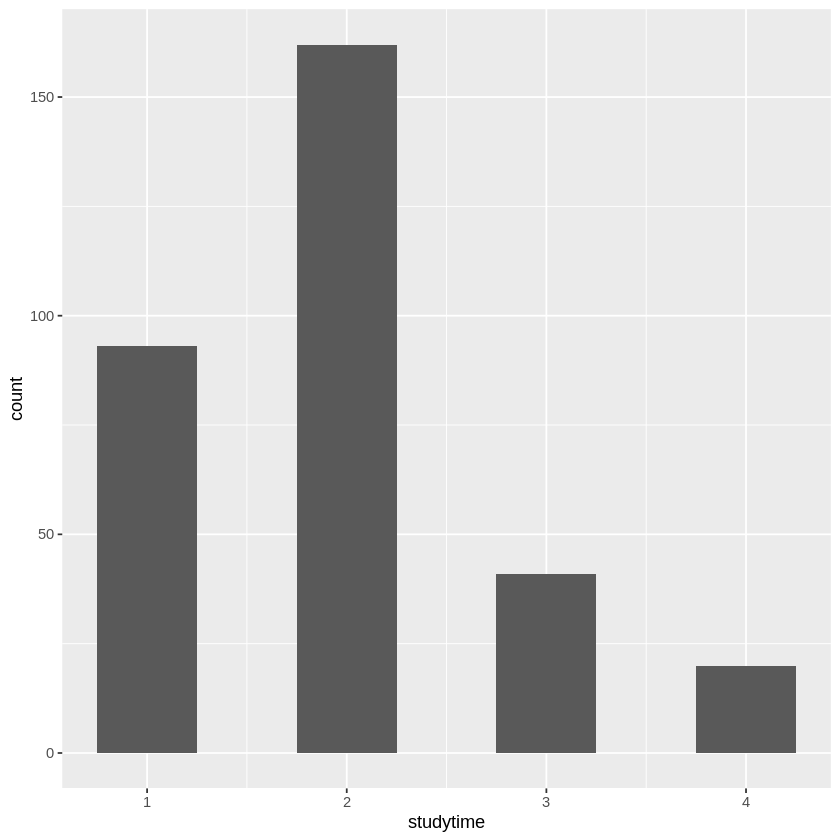

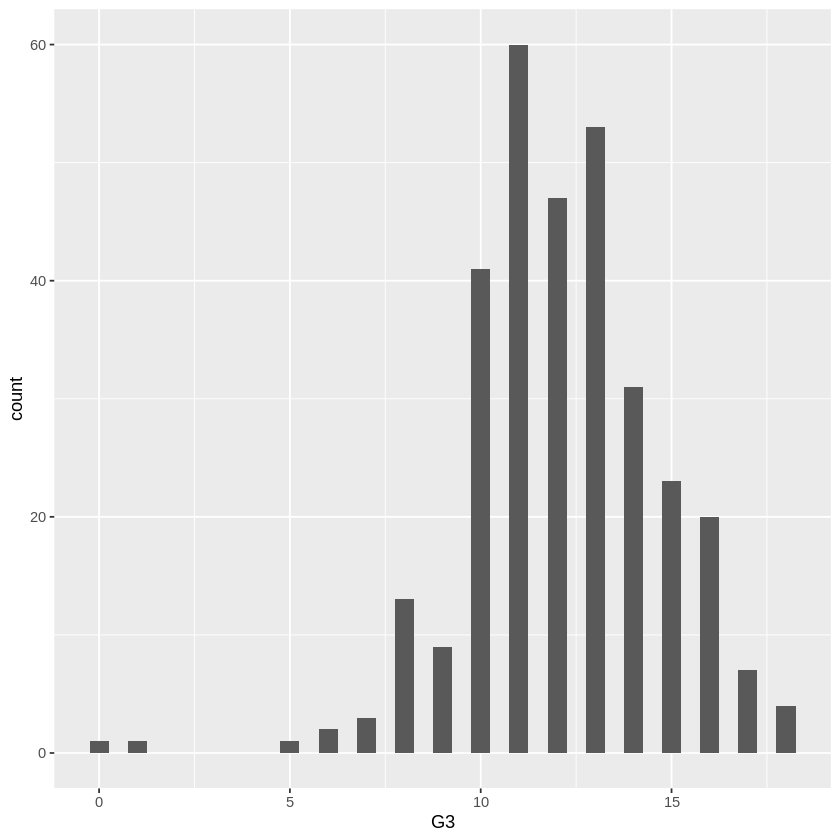

In [117]:
studytime_hist <- ggplot(student_performance_training, aes(x = studytime)) +
    geom_histogram(binwidth = 0.5)
studytime_hist

G3_hist <- ggplot(student_performance_training, aes(x = G3)) +
    geom_histogram(binwidth = 0.5)
G3_hist

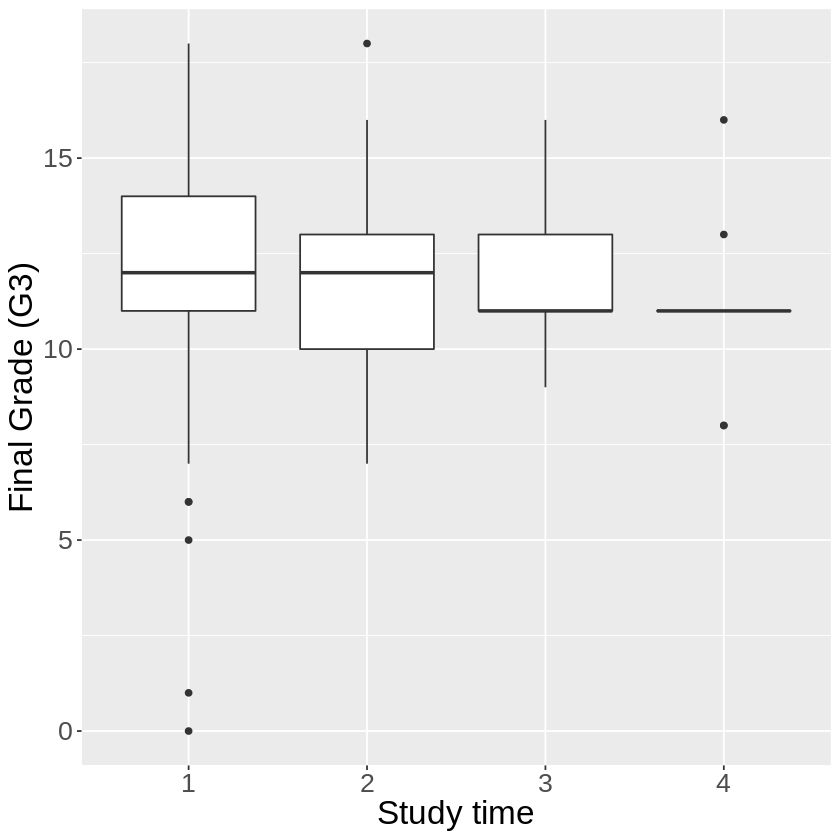

In [119]:
travel_vs_study_plot <- ggplot(student_performance_training, aes(x = traveltime, y = G3)) +
    geom_boxplot() +
    labs(x = "Study time", y = "Final Grade (G3)") +
    theme(text = element_text(size = 20)) 
travel_vs_study_plot

### _Methods_

* We will be using “studytime”, “traveltime” and “G3” variables from the dataset.
* We will be using correlation analysis (a bar graph) to find if there is a correlation between travel time and study time.
* We will be using prediction analysis (the K-nearest neighbor classification algorithm) to see if we can predict the final grade (G3) of a student, using travel time and study time as predictors. 


### _Expected outcomes and significance_

__What do you expect to find?__
* We expect to find a negative correlation between study time and travel time. 
* We expect to predict the final grade (G3) of a student, using travel time and study time as predictors. We expect that travel time and study time are impacting the academic performance of students. 

__What impact could such findings have?__
* Impact of travel time and study time on students’ academic performance 
* To find if there is a relationship between students’ travel time and study time

__What future questions could this lead to?__
* What factors are impacting student academic performance? 
* What are some ways to increase academic success?


### _References_

Dutton, J., Dutton, M., &amp; Perry, J. (2019). How do online students differ from lecture students? Online Learning, 6(1). doi:10.24059/olj.v6i1.1869

López Turley, R. N., & Wodtke, G. (2010). College Residence and Academic Performance: Who Benefits From Living on Campus? Urban Education, 45(4), 506–532. https://doi.org/10.1177/0042085910372351

Wu, Q. (2014). Associations between travel behavior and the academic performance of university students. Retrieved March 06, 2021, from https://tigerprints.clemson.edu/all_theses/2063/
